[![DOI](https://zenodo.org/badge/289387436.svg)](https://zenodo.org/badge/latestdoi/289387436)
[![Downloads](https://static.pepy.tech/badge/miceforest)](https://pepy.tech/project/miceforest)
[![Pypi](https://img.shields.io/pypi/v/miceforest.svg)](https://pypi.python.org/pypi/miceforest)
[![Conda
Version](https://img.shields.io/conda/vn/conda-forge/miceforest.svg)](https://anaconda.org/conda-forge/miceforest)
[![PyVersions](https://img.shields.io/pypi/pyversions/miceforest.svg?logo=python&logoColor=white)](https://pypi.org/project/miceforest/)  
[![tests +
mypy](https://github.com/AnotherSamWilson/miceforest/actions/workflows/run_tests.yml/badge.svg)](https://github.com/AnotherSamWilson/miceforest/actions/workflows/run_tests.yml)
[![Documentation
Status](https://readthedocs.org/projects/miceforest/badge/?version=latest)](https://miceforest.readthedocs.io/en/latest/?badge=latest)
[![CodeCov](https://codecov.io/gh/AnotherSamWilson/miceforest/branch/master/graphs/badge.svg?branch=master&service=github)](https://codecov.io/gh/AnotherSamWilson/miceforest)
<!-- [![MIT license](http://img.shields.io/badge/license-MIT-brightgreen.svg)](http://opensource.org/licenses/MIT) -->
<!-- [![Code style: black](https://img.shields.io/badge/code%20style-black-000000.svg)](https://github.com/psf/black)   -->
<!-- [![DEV_Version_Badge](https://img.shields.io/badge/Dev-5.6.3-blue.svg)](https://pypi.org/project/miceforest/) -->


# miceforest: Fast, Memory Efficient Imputation with LightGBM

<a href='https://github.com/AnotherSamWilson/miceforest'><img src='https://i.imgur.com/jJPThrd.png' align="right" height="300" /></a>

Fast, memory efficient Multiple Imputation by Chained Equations (MICE)
with lightgbm. The R version of this package may be found
[here](https://github.com/FarrellDay/miceRanger).

`miceforest` was designed to be:

  - **Fast**
      - Uses lightgbm as a backend
      - Has efficient mean matching solutions.
      - Can utilize GPU training
  - **Flexible**
      - Can impute pandas dataframes and numpy arrays
      - Handles categorical data automatically
      - Fits into a sklearn pipeline
      - User can customize every aspect of the imputation process
  - **Production Ready**
      - Can impute new, unseen datasets quickly
      - Kernels are efficiently compressed during saving and loading
      - Data can be imputed in place to save memory
      - Can build models on non-missing data


This document contains a thorough walkthrough of the package,
benchmarks, and an introduction to multiple imputation. More information
on MICE can be found in Stef van Buuren’s excellent online book, which
you can find
[here](https://stefvanbuuren.name/fimd/ch-introduction.html).

#### Table of Contents:

  - [Classes](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#classes)
  - [Basic Usage](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#basic-usage)
      - [Example](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#basic-usage)
      - [Customizing LightGBM Parameters](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#customizing-lightgbm-parameters)
      - [Available Mean Match Schemes](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#adjusting-the-mean-matching-scheme)
      - [Imputing New Data with Existing Models](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#imputing-new-data-with-existing-models)
      - [Saving and Loading Kernels](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#saving-and-loading-kernels)
      - [Implementing sklearn Pipelines](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#saving-and-loading-kernels)
  - [Advanced Features](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#advanced-features)
      - [Building Models on Nonmissing Data](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#building-models-on-nonmissing-data)
      - [Tuning Parameters](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#tuning-parameters)
      - [On Reproducibility](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#on-reproducibility)
      - [How to Make the Process Faster](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#how-to-make-the-process-faster)
      - [Imputing Data In Place](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#imputing-data-in-place)
  - [Diagnostic Plotting](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#diagnostic-plotting)
      - [Feature Importance](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#feature-importance)
      - [Imputed Distributions](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#plot-imputed-distributions)
  - [Using the Imputed Data](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#using-the-imputed-data)
  - [The MICE Algorithm](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#the-mice-algorithm)
      - [Introduction](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#the-mice-algorithm)
      - [Common Use Cases](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#common-use-cases)
      - [Predictive Mean Matching](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#predictive-mean-matching)
      - [Effects of Mean Matching](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#effects-of-mean-matching)

## Installation

This package can be installed using either pip or conda, through
conda-forge:

``` bash
# Using pip
$ pip install miceforest --no-cache-dir

# Using conda
$ conda install -c conda-forge miceforest
```

You can also download the latest development version from this
repository. If you want to install from github with conda, you must
first run `conda install pip git`.

``` bash
$ pip install git+https://github.com/AnotherSamWilson/miceforest.git
```

## Classes

miceforest has 2 main classes which the user will interact with:

  - [`ImputationKernel`](https://miceforest.readthedocs.io/en/latest/ImputationKernel.html)
    - This class contains the raw data off of which the `mice` algorithm
    is performed. During this process, models will be trained, and the
    imputed (predicted) values will be stored. These values can be used
    to fill in the missing values of the raw data. The raw data can be
    copied, or referenced directly. Models can be saved, and used to
    impute new datasets.
  - [`ImputedData`](https://miceforest.readthedocs.io/en/latest/ImputedData.html)
    - The result of `ImputationKernel.impute_new_data(new_data)`. This
    contains the raw data in `new_data` as well as the imputed values.  


## Basic Usage

We will be looking at a few simple examples of imputation. We need to
load the packages, and define the data:

In [1]:
import miceforest as mf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load data and introduce missing values
iris = pd.concat(load_iris(as_frame=True,return_X_y=True),axis=1)
iris.rename({"target": "species"}, inplace=True, axis=1)
iris['species'] = iris['species'].astype('category')
iris_amp = mf.ampute_data(iris,perc=0.25,random_state=1991)

If you only want to create a single imputed dataset, you can use
[`ImputationKernel`](https://miceforest.readthedocs.io/en/latest/ImputationKernel.html)
with some default settings:

In [2]:
# Create kernel. 
kds = mf.ImputationKernel(
  iris_amp,
  random_state=1991
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
iris_complete = kds.complete_data()

There are also an array of plotting functions available, these are
discussed below in the section [Diagnostic
Plotting](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#diagnostic-plotting).  

We usually don’t want to impute just a single dataset. In statistics,
multiple imputation is a process by which the uncertainty/other effects
caused by missing values can be examined by creating multiple different
imputed datasets.
[`ImputationKernel`](https://miceforest.readthedocs.io/en/latest/ImputationKernel.html)
can contain an arbitrary number of different datasets, all of which have
gone through mutually exclusive imputation processes:

In [3]:
# Create kernel. 
kernel = mf.ImputationKernel(
  iris_amp,
  num_datasets=4,
  random_state=1
)

# Run the MICE algorithm for 2 iterations on each of the datasets
kernel.mice(2)

# Printing the kernel will show you some high level information.
print(kernel)


              Class: ImputationKernel
            Datasets: 4
          Iterations: 2
        Data Samples: 150
        Data Columns: 5
   Imputed Variables: 5
   Modeled Variables: 5
All Iterations Saved: True
        


After we have run mice, we can obtain our completed dataset directly
from the kernel:

In [4]:
completed_dataset = kernel.complete_data(dataset=2)
print(completed_dataset.isnull().sum(0))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## Customizing LightGBM Parameters

Parameters can be passed directly to lightgbm in several different ways.
Parameters you wish to apply globally to every model can simply be
passed as kwargs to `mice`:

In [5]:
# Run the MICE algorithm for 1 more iteration on the kernel with new parameters
kernel.mice(iterations=1, n_estimators=50)

You can also pass pass variable-specific arguments to
`variable_parameters` in mice. For instance, let’s say you noticed the
imputation of the `[species]` column was taking a little longer, because
it is multiclass. You could decrease the n\_estimators specifically for
that column with:

In [6]:
# Run the MICE algorithm for 2 more iterations on the kernel 
kernel.mice(
  iterations=1,
  variable_parameters={'species': {'n_estimators': 25}},
  n_estimators=50
)

# Let's get the actual models for these variables:
species_model = kernel.get_model(dataset=0,variable="species")
sepalwidth_model = kernel.get_model(dataset=0,variable="sepal width (cm)")

print(
f"""Species used {str(species_model.params["num_iterations"])} iterations
Sepal Width used {str(sepalwidth_model.params["num_iterations"])} iterations
"""
)

Species used 25 iterations
Sepal Width used 50 iterations



In this scenario, any parameters specified in `variable_parameters`
takes presidence over the kwargs.

Since we can pass any parameters we want to LightGBM, we can completely
customize how our models are built. That includes how the data should be
modeled. If your data contains count data, or any other data which can
be parameterized by lightgbm, you can simply specify that variable to be
modeled with the corresponding objective function.

For example, let’s pretend `sepal width (cm)` is a count field which can
be parameterized by a Poisson distribution. Let’s also change our
boosting method to gradient boosted trees:

In [7]:
# Create kernel. 
cust_kernel = mf.ImputationKernel(
  iris_amp,
  num_datasets=1,
  random_state=1
)

cust_kernel.mice(
  iterations=1, 
  variable_parameters={'sepal width (cm)': {'objective': 'poisson'}},
  boosting = 'gbdt',
  min_sum_hessian_in_leaf=0.01
)

Other nice parameters like `monotone_constraints` can also be passed.
Setting the parameter `device: 'gpu'` will utilize GPU learning, if
LightGBM is set up to do this on your machine.

## Adjusting The Mean Matching Scheme

Note: It is probably a good idea to read [this
section](https://github.com/AnotherSamWilson/miceforest?tab=readme-ov-file#predictive-mean-matching)
first, to get some context on how mean matching works.

There are 4 imputation strategies employed by `miceforest`:
- **Fast** Mean Matching: Available only on binary and categorical variables. Chooses a class randomly based on the predicted probabilities output by lightgbm.
- **Normal** Mean Matching: Employs mean matching as described in the section below.
- **Shap** Mean Matching: Runs a nearest neighbor search on the shap values of the bachelor predictions in the shap values of the candidate predictions. Finds the `mean_match_candidates` nearest neighbors, and chooses one randomly as the imputation value.
- Value Imputation: Uses the value output by lightgbm as the imputation value. Skips mean matching entirely. To use, set `mean_match_candidates = 0`.

Here is the code required to use each method:

In [8]:
# Create kernel. 
cust_kernel = mf.ImputationKernel(
  iris_amp,
  num_datasets=1,
  random_state=1,
  mean_match_strategy={
      'sepal length (cm)': 'normal',
      'sepal width (cm)': 'shap',
      'species': 'fast',
  },
  mean_match_candidates={
      'petal length (cm)': 0,
      }
)

cust_kernel.mice(
  iterations=1, 
)

## Imputing New Data with Existing Models

Multiple Imputation can take a long time. If you wish to impute a
dataset using the MICE algorithm, but don’t have time to train new
models, it is possible to impute new datasets using a `ImputationKernel`
object. The `impute_new_data()` function uses the models collected by
`ImputationKernel` to perform multiple imputation without updating the
models at each iteration:

In [9]:
# Our 'new data' is just the first 15 rows of iris_amp
from datetime import datetime

# Define our new data as the first 15 rows
new_data = iris_amp.iloc[range(15)].reset_index(drop=True)

start_t = datetime.now()
new_data_imputed = cust_kernel.impute_new_data(new_data=new_data)
print(f"New Data imputed in {(datetime.now() - start_t).total_seconds()} seconds")

New Data imputed in 0.040396 seconds


## Saving and Loading Kernels

Saving `miceforest` kernels is efficient. During the pickling process, the following steps are taken:

1.  Convert working data to parquet bytes.
2.  Serialize the kernel.
4.  Save to a file.

You can save and load the kernel like any other object using `pickle` or `dill`:


In [10]:
from tempfile import mkstemp
import dill
new_file, filename = mkstemp()

with open(filename, "wb") as f:
    dill.dump(kernel, f)

with open(filename, "rb") as f:
    kernel_from_pickle = dill.load(f)

## Implementing sklearn Pipelines

`miceforest` kernels can be fit into sklearn pipelines to impute training and scoring
datasets:

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import miceforest as mf

kernel = mf.ImputationKernel(iris_amp, num_datasets=1, random_state=1)

pipe = Pipeline([
    ('impute', kernel),
    ('scaler', StandardScaler()),
])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
X_train_t = pipe.fit_transform(
    X=iris_amp,
    y=None,
    impute__iterations=2
)
X_test_t = pipe.transform(new_data)

# Show that neither now have missing values.
assert not np.any(np.isnan(X_train_t))
assert not np.any(np.isnan(X_test_t))

# Advanced Features

## Building Models on Nonmissing Data

The MICE process itself is used to impute missing data in a dataset.
However, sometimes a variable can be fully recognized in the training
data, but needs to be imputed later on in a different dataset. It is
possible to train models to impute variables even if they have no
missing values by specifying them in the `variable_schema` parameter. 
In this case, `variable_schema` is treated as the list of variables 
to train models on.

In [12]:
# Set petal length (cm) in our amputed data 
# to original values with no missing data.
iris_amp['sepal width (cm)'] = iris['sepal width (cm)'].copy()
iris_amp.isnull().sum()

sepal length (cm)    37
sepal width (cm)      0
petal length (cm)    37
petal width (cm)     37
species              37
dtype: int64

In [13]:
kernel = mf.ImputationKernel(
    data=iris_amp, 
    variable_schema=iris_amp.columns.to_list(), 
    num_datasets=1,
    random_state=1,
)
kernel.mice(1)

In [14]:
# Remember, the dataset we are imputing does have 
# missing values in the sepal width (cm) column
new_data.isnull().sum()

sepal length (cm)    4
sepal width (cm)     3
petal length (cm)    1
petal width (cm)     3
species              3
dtype: int64

In [15]:
new_data_imp = kernel.impute_new_data(new_data)
new_data_imp = new_data_imp.complete_data()

# All columns have been imputed.
new_data_imp.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Tuning Parameters

`miceforest` allows you to tune the parameters on a kernel dataset.
These parameters can then be used to build the models in future
iterations of mice. In its most simple invocation, you can just call the
function with the desired optimization steps:

In [16]:
optimal_params = kernel.tune_parameters(
    dataset=0, 
    use_gbdt=True,
    num_iterations=500,
    random_state=1,
)
kernel.mice(1, variable_parameters=optimal_params)
pd.DataFrame(optimal_params)

,sepal length (cm),petal length (cm),petal width (cm),species
boosting,gbdt,gbdt,gbdt,gbdt
data_sample_strategy,bagging,bagging,bagging,bagging
num_iterations,142,248,262,172
max_depth,4,4,5,5
num_leaves,12,17,2,19
min_data_in_leaf,2,2,15,5
min_sum_hessian_in_leaf,0.1,0.1,0.1,0.1
min_gain_to_split,0.0,0.0,0.0,0.0
bagging_fraction,0.580973,0.501521,0.586709,0.795465
feature_fraction_bynode,0.922566,0.299912,0.503182,0.237637


This will perform 10 fold cross validation on random samples of
parameters. By default, all variables models are tuned.  

The parameter tuning is pretty flexible. If you wish to set some model
parameters static, or to change the bounds that are searched in, you can
simply pass this information to either the `variable_parameters`
parameter, `**kwbounds`, or both:

In [17]:
optimal_params = kernel.tune_parameters(
  dataset=0,
  variables = ['sepal width (cm)','species','petal width (cm)'],
  variable_parameters = {
    'sepal width (cm)': {'bagging_fraction': 0.5},
    'species': {'bagging_freq': (5,10)}
  },
  use_gbdt=True,
  optimization_steps=5,
  extra_trees = [True, False]
)

kernel.mice(1, variable_parameters=optimal_params)

In this example, we did a few things - we specified that only `sepal
width (cm)`, `species`, and `petal width (cm)` should be tuned. We also
specified some specific parameters in `variable_parameters`. Notice that
`bagging_fraction` was passed as a scalar, `0.5`. This means that, for
the variable `sepal width (cm)`, the parameter `bagging_fraction` will
be set as that number and not be tuned. We did the opposite for
`bagging_freq`. We specified bounds that the process should search in.
We also passed the argument `extra_trees` as a list. Since it was passed
to \*\*kwbounds, this parameter will apply to all variables that are
being tuned. Passing values as a list tells the process that it should
randomly sample values from the list, instead of treating them as set of
counts to search within.

Additionally, we set `use_gbdt=True`. This switches the process to use
gradient boosted trees, instead of random forests. Typically, gradient
boosted trees will perform better. The optimal `num_iterations` is also
determined by early stopping in cross validation.

The tuning process follows these rules for different parameter values it
finds:

  - Scalar: That value is used, and not tuned.  
  - Tuple: Should be length 2. Treated as the lower and upper bound to
    search in.  
  - List: Treated as a distinct list of values to try randomly.


## On Reproducibility

`miceforest` allows for different “levels” of reproducibility, global
and record-level.

##### **Global Reproducibility**

Global reproducibility ensures that the same values will be imputed if
the same code is run multiple times. To ensure global reproducibility,
all the user needs to do is set a `random_state` when the kernel is
initialized.

##### **Record-Level Reproducibility**

Sometimes we want to obtain reproducible imputations at the record
level, without having to pass the same dataset. This is possible by
passing a list of record-specific seeds to the `random_seed_array`
parameter. This is useful if imputing new data multiple times, and you
would like imputations for each row to match each time it is imputed.


In [18]:
# Define seeds for the data, and impute iris
import numpy as np
random_seed_array = np.random.randint(0, 9999, size=iris_amp.shape[0], dtype='uint32')
iris_imputed = kernel.impute_new_data(
    iris_amp,
    random_state=4,
    random_seed_array=random_seed_array
)

# Select a random sample
new_inds = np.random.choice(150, size=15)
new_data = iris_amp.loc[new_inds].reset_index(drop=True)
new_seeds = random_seed_array[new_inds]
new_imputed = kernel.impute_new_data(
    new_data,
    random_state=4,
    random_seed_array=new_seeds
)

# We imputed the same values for the 15 values each time,
# because each record was associated with the same seed.
assert new_imputed.complete_data(0).equals(
    iris_imputed.complete_data(0).loc[new_inds].reset_index(drop=True)
)

## How to Make the Process Faster

Multiple Imputation is one of the most robust ways to handle missing
data - but it can take a long time. There are several strategies you can
use to decrease the time a process takes to run:

  - Decrease `data_subset`. By default all non-missing datapoints for
    each variable are used to train the model and perform mean matching.
    This can cause the model training nearest-neighbors search to take a
    long time for large data. A subset of these points can be searched
    instead by using `data_subset`.  
  - If categorical columns are taking a long time, you can set 
    `mean_match_strategy="fast"`. You can also set different parameters
    specifically for categorical columns, like smaller `bagging_fraction` 
    or `num_iterations`, or try grouping the categories before they are
    imputed. Model training time for categorical variables is linear with
    the number of distinct categories. 
  - Decrease `mean_match_candidates`. The maximum number of neighbors
    that are considered with the default parameters is 10. However, for
    large datasets, this can still be an expensive operation. Consider
    explicitly setting `mean_match_candidates` lower. Setting 
    `mean_match_candidates=0` will skip mean matching entirely, and 
    just use the lightgbm predictions as the imputation values.
  - Use different lightgbm parameters. lightgbm is usually not the
    problem, however if a certain variable has a large number of
    classes, then the max number of trees actually grown is (\# classes)
    \* (n\_estimators). You can specifically decrease the bagging
    fraction or n\_estimators for large multi-class variables, or grow
    less trees in general.  

## Imputing Data In Place

It is possible to run the entire process without copying the dataset. If
`copy_data=False`, then the data is referenced directly:


In [19]:
kernel_inplace = mf.ImputationKernel(
  iris_amp,
  num_datasets=1,
  copy_data=False,
  random_state=1,
)
kernel_inplace.mice(2)

Note, that this probably won’t (but could) change the original dataset
in undesirable ways. Throughout the `mice` procedure, imputed values are
stored directly in the original data. At the end, the missing values are
put back as `np.NaN`.

We can also complete our original data in place. This is useful if the dataset is large, and copies can’t be made in
memory:

In [20]:
kernel_inplace.complete_data(dataset=0, inplace=True)
print(iris_amp.isnull().sum(0))

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# Diagnostic Plotting

As of now, there are 2 diagnostic plot available. More coming soon!

### Feature Importance

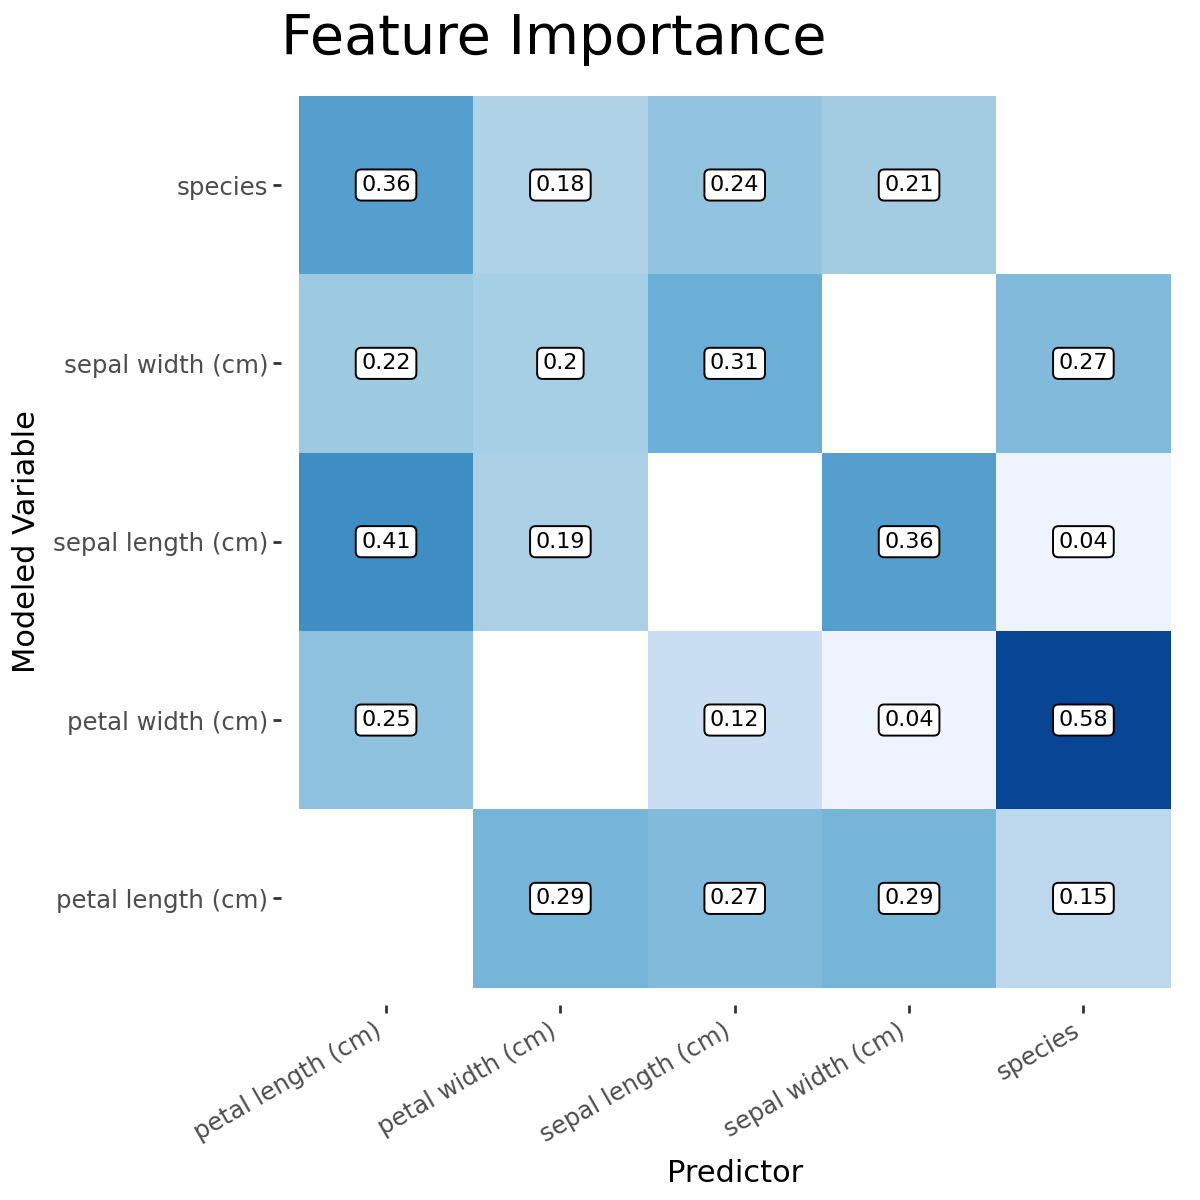

In [21]:
kernel.plot_feature_importance(dataset=0)

### Plot Imputed Distributions

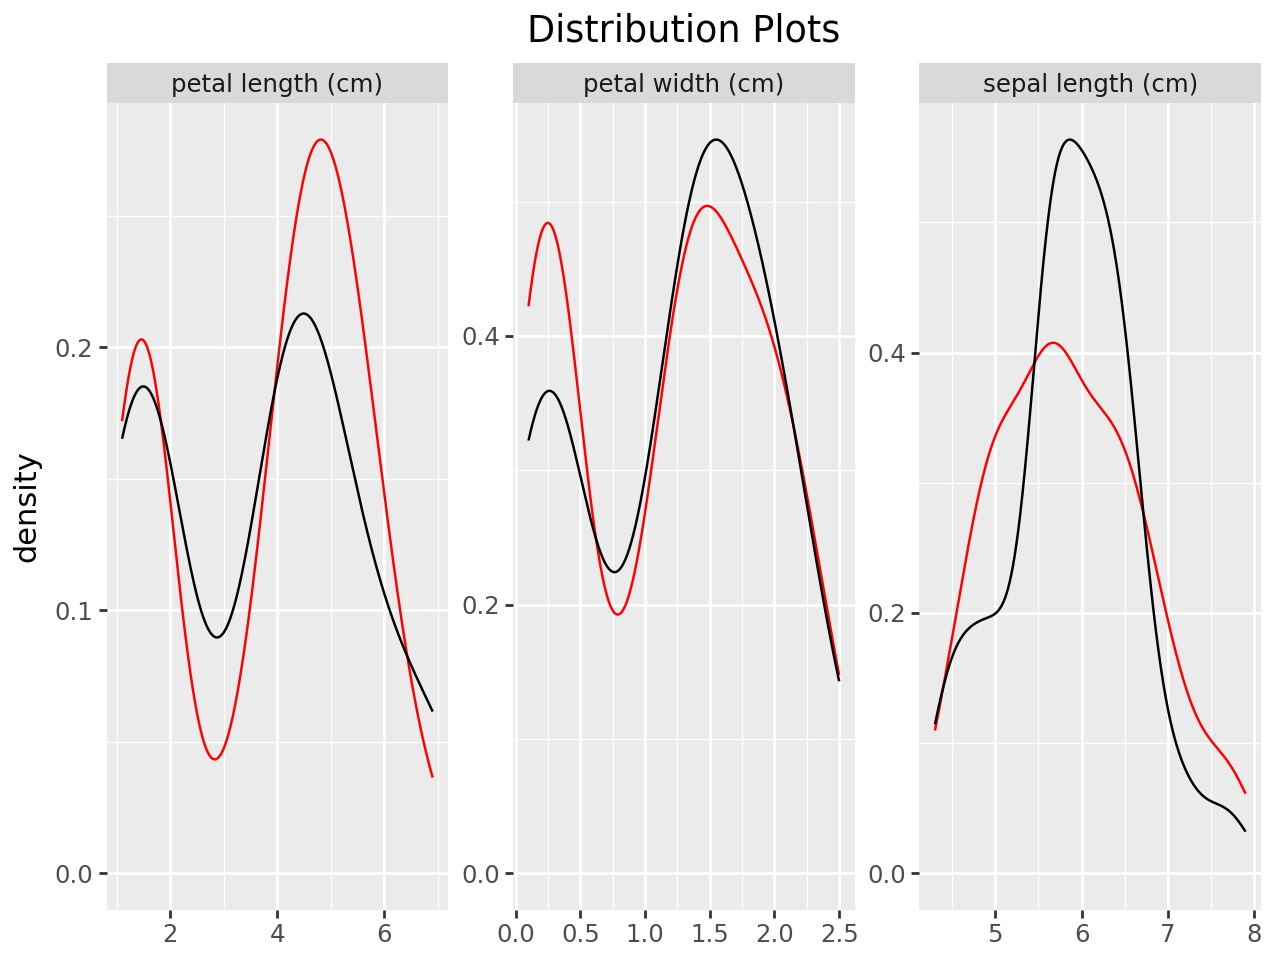

In [22]:
kernel.plot_imputed_distributions()

## Using the Imputed Data

To return the imputed data simply use the `complete_data` method:

In [23]:
dataset_1 = kernel.complete_data(0)

This will return a single specified dataset. Multiple datasets are
typically created so that some measure of confidence around each
prediction can be created.

Since we know what the original data looked like, we can cheat and see
how well the imputations compare to the original data:

In [24]:
acclist = []
iterations = kernel.iteration_count()+1
for iteration in range(iterations):
    species_na_count = kernel.na_counts['species']
    compdat = kernel.complete_data(dataset=0,iteration=iteration)
    
    # Record the accuract of the imputations of species.
    acclist.append(
      round(1-sum(compdat['species'] != iris['species'])/species_na_count,2)
    )

# acclist shows the accuracy of the imputations over the iterations.
acclist = pd.Series(acclist).rename("Species Imputation Accuracy")
acclist.index = range(iterations)
acclist.index.name = "Iteration"
acclist

Iteration
0    0.35
1    0.81
2    0.81
3    0.78
Name: Species Imputation Accuracy, dtype: float64

In this instance, we went from a low accuracy (what is expected with
random sampling) to a much higher accuracy.

## The MICE Algorithm

Multiple Imputation by Chained Equations ‘fills in’ (imputes) missing
data in a dataset through an iterative series of predictive models. In
each iteration, each specified variable in the dataset is imputed using
the other variables in the dataset. These iterations should be run until
it appears that convergence has been met.

<img src="https://i.imgur.com/2L403kU.png" style="display: block; margin: auto;" />

This process is continued until all specified variables have been
imputed. Additional iterations can be run if it appears that the average
imputed values have not converged, although no more than 5 iterations
are usually necessary.

### Common Use Cases

##### **Data Leakage:**

MICE is particularly useful if missing values are associated with the
target variable in a way that introduces leakage. For instance, let’s
say you wanted to model customer retention at the time of sign up. A
certain variable is collected at sign up or 1 month after sign up. The
absence of that variable is a data leak, since it tells you that the
customer did not retain for 1 month.

##### **Funnel Analysis:**

Information is often collected at different stages of a ‘funnel’. MICE
can be used to make educated guesses about the characteristics of
entities at different points in a funnel.

##### **Confidence Intervals:**

MICE can be used to impute missing values, however it is important to
keep in mind that these imputed values are a prediction. Creating
multiple datasets with different imputed values allows you to do two
types of inference:

  - Imputed Value Distribution: A profile can be built for each imputed
    value, allowing you to make statements about the likely distribution
    of that value.  
  - Model Prediction Distribution: With multiple datasets, you can build
    multiple models and create a distribution of predictions for each
    sample. Those samples with imputed values which were not able to be
    imputed with much confidence would have a larger variance in their
    predictions.


## Predictive Mean Matching

`miceforest` can make use of a procedure called predictive mean matching
(PMM) to select which values are imputed. PMM involves selecting a
datapoint from the original, nonmissing data (candidates) which has a
predicted value close to the predicted value of the missing sample
(bachelors). The closest N (`mean_match_candidates` parameter) values
are selected, from which a value is chosen at random. This can be
specified on a column-by-column basis. Going into more detail from our
example above, we see how this works in practice:

<img src="https://i.imgur.com/3DBCXnL.png" style="display: block; margin: auto;" />

This method is very useful if you have a variable which needs imputing
which has any of the following characteristics:

  - Multimodal  
  - Integer  
  - Skewed


### Effects of Mean Matching

As an example, let’s construct a dataset with some of the above
characteristics:

In [25]:
randst = np.random.RandomState(1991)
# random uniform variable
nrws = 1000
uniform_vec = randst.uniform(size=nrws)

def make_bimodal(mean1,mean2,size):
    bimodal_1 = randst.normal(size=nrws, loc=mean1)
    bimodal_2 = randst.normal(size=nrws, loc=mean2)
    bimdvec = []
    for i in range(size):
        bimdvec.append(randst.choice([bimodal_1[i], bimodal_2[i]]))
    return np.array(bimdvec)

# Make 2 Bimodal Variables
close_bimodal_vec = make_bimodal(2,-2,nrws)
far_bimodal_vec = make_bimodal(3,-3,nrws)


# Highly skewed variable correlated with Uniform_Variable
skewed_vec = np.exp(uniform_vec*randst.uniform(size=nrws)*3) + randst.uniform(size=nrws)*3

# Integer variable correlated with Close_Bimodal_Variable and Uniform_Variable
integer_vec = np.round(uniform_vec + close_bimodal_vec/3 + randst.uniform(size=nrws)*2)

# Make a DataFrame
dat = pd.DataFrame(
    {
    'uniform_var':uniform_vec,
    'close_bimodal_var':close_bimodal_vec,
    'far_bimodal_var':far_bimodal_vec,
    'skewed_var':skewed_vec,
    'integer_var':integer_vec
    }
)

# Ampute the data.
ampdat = mf.ampute_data(dat,perc=0.25,random_state=randst)

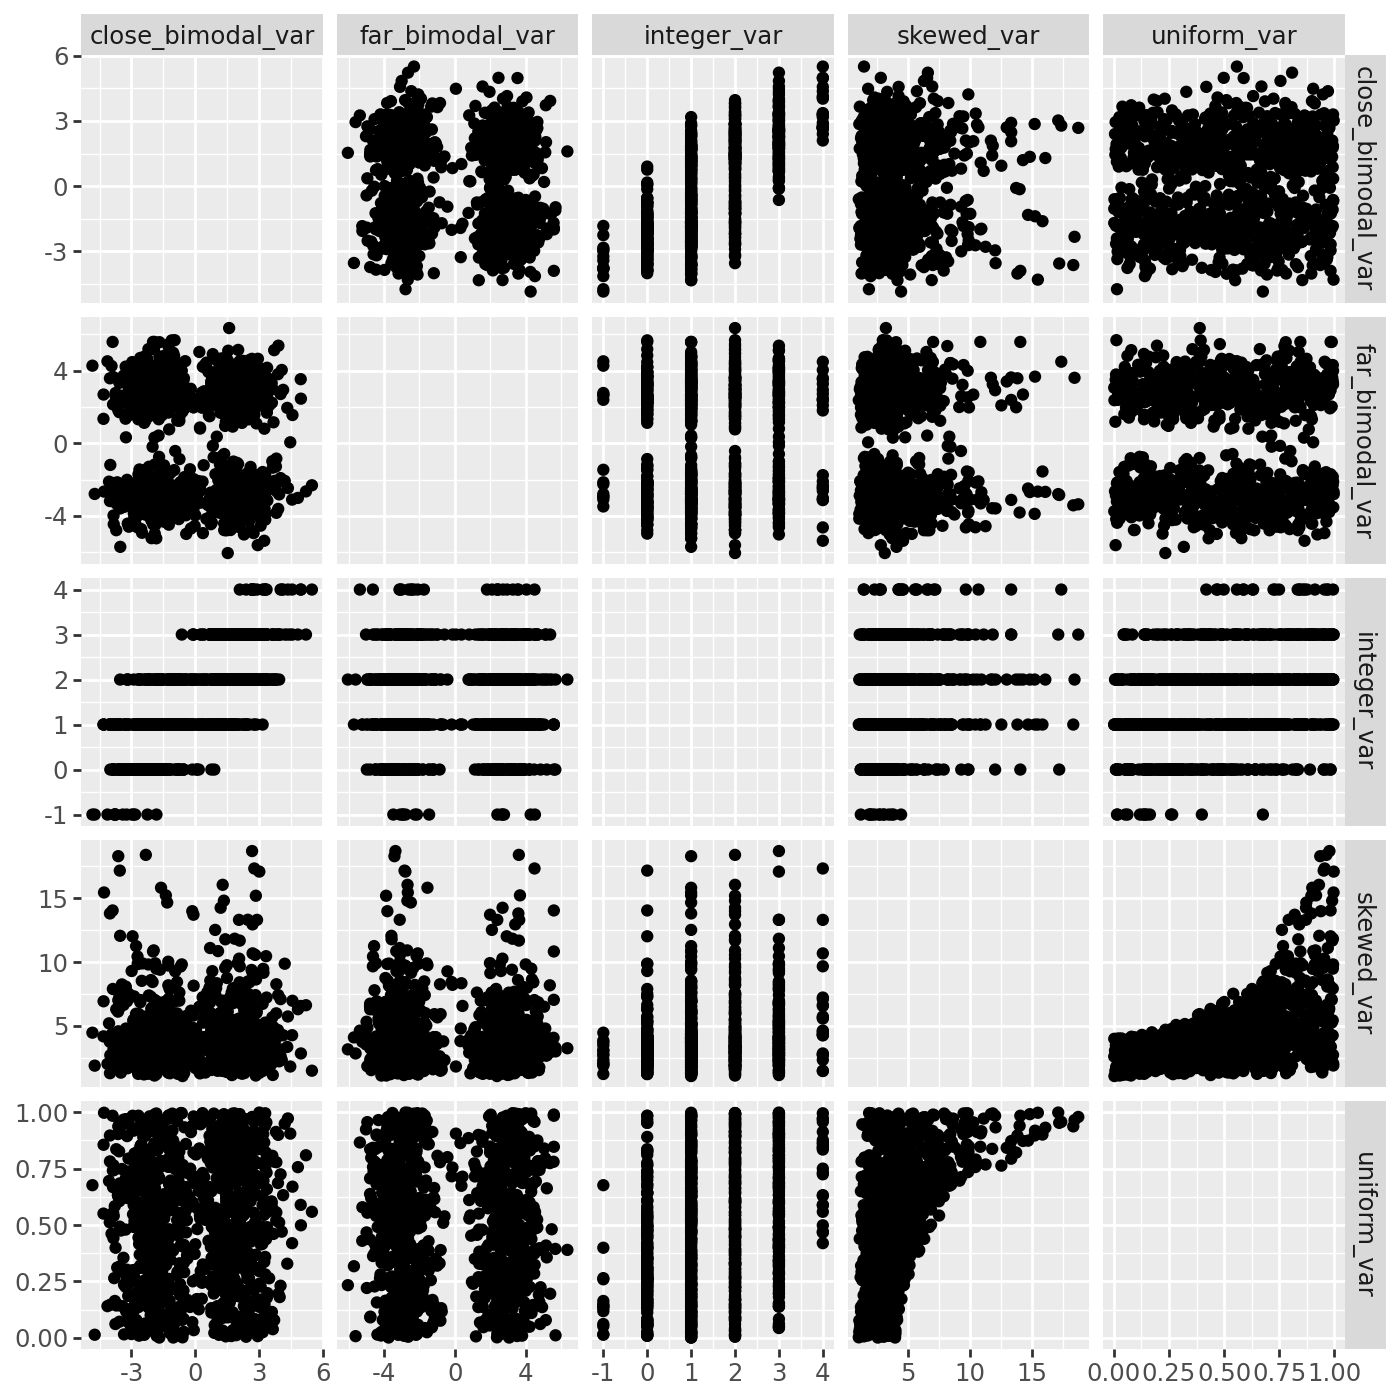

In [26]:
import plotnine as p9
import itertools

def plot_matrix(df, columns):
    pdf = []
    for a1, b1 in itertools.combinations(columns, 2):
        for (a,b) in ((a1, b1), (b1, a1)):
            sub = df[[a, b]].rename(columns={a: "x", b: "y"}).assign(a=a, b=b)
            pdf.append(sub)

    g = (
        p9.ggplot(pd.concat(pdf))
            + p9.geom_point(p9.aes('x','y'))
            + p9.facet_grid('b~a', scales='free')
            + p9.theme(figure_size=(7, 7))
            + p9.xlab("") + p9.ylab("")
    )
    return g

plot_matrix(dat, dat.columns)

We can see how our variables are distributed and correlated in the graph
above. Now let’s run our imputation process twice, once using mean
matching, and once using the model prediction.

In [27]:
kernel_mean_match = mf.ImputationKernel(
    data=ampdat,
    num_datasets=3,
    mean_match_candidates=5,
    random_state=1
)
kernel_mean_match.mice(2)
kernel_no_mean_match = mf.ImputationKernel(
    data=ampdat,
    num_datasets=3,
    mean_match_candidates=0,
    random_state=1
)
kernel_no_mean_match.mice(2)

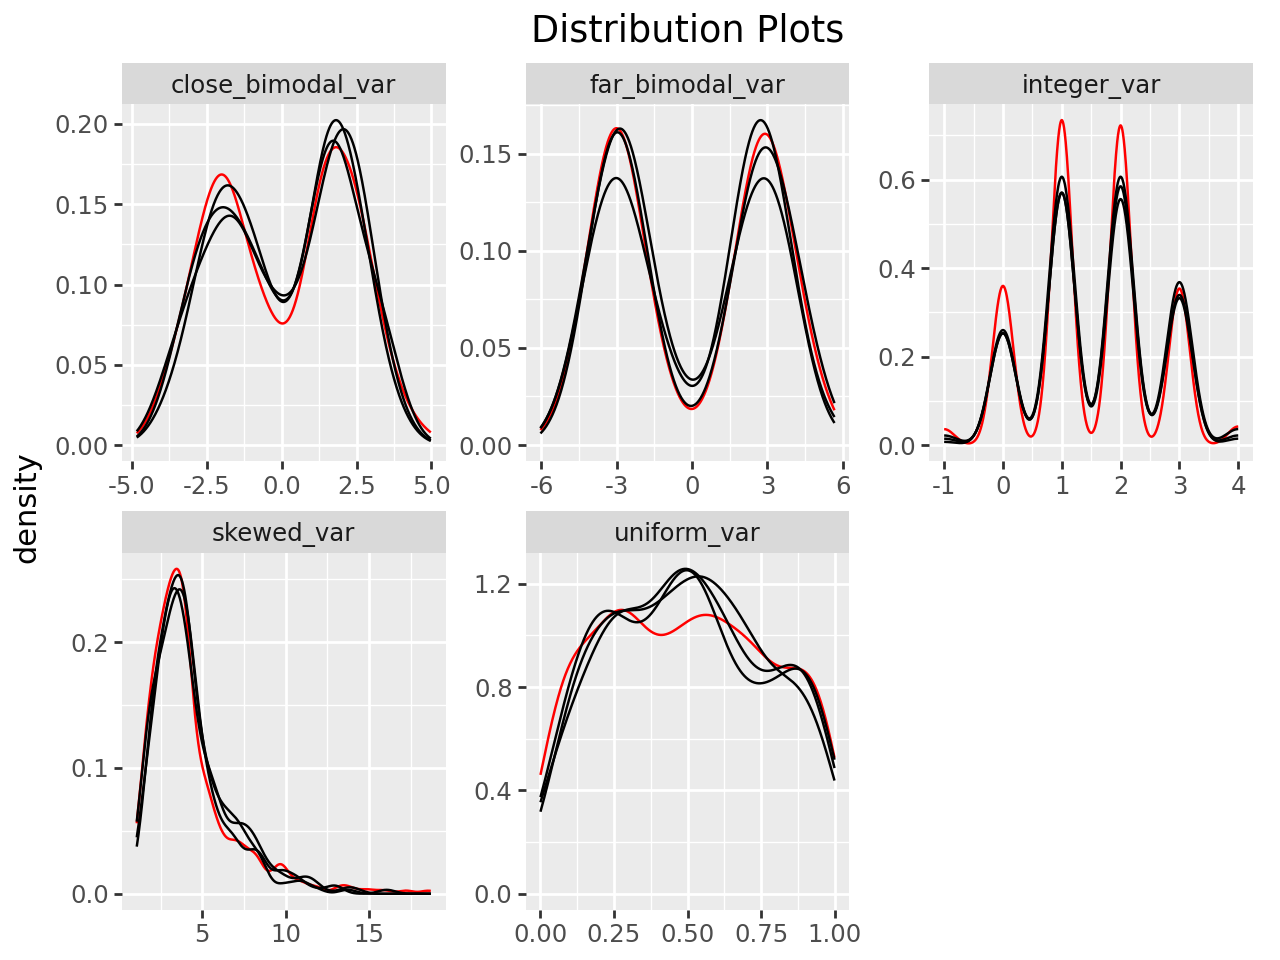

In [28]:
kernel_mean_match.plot_imputed_distributions()

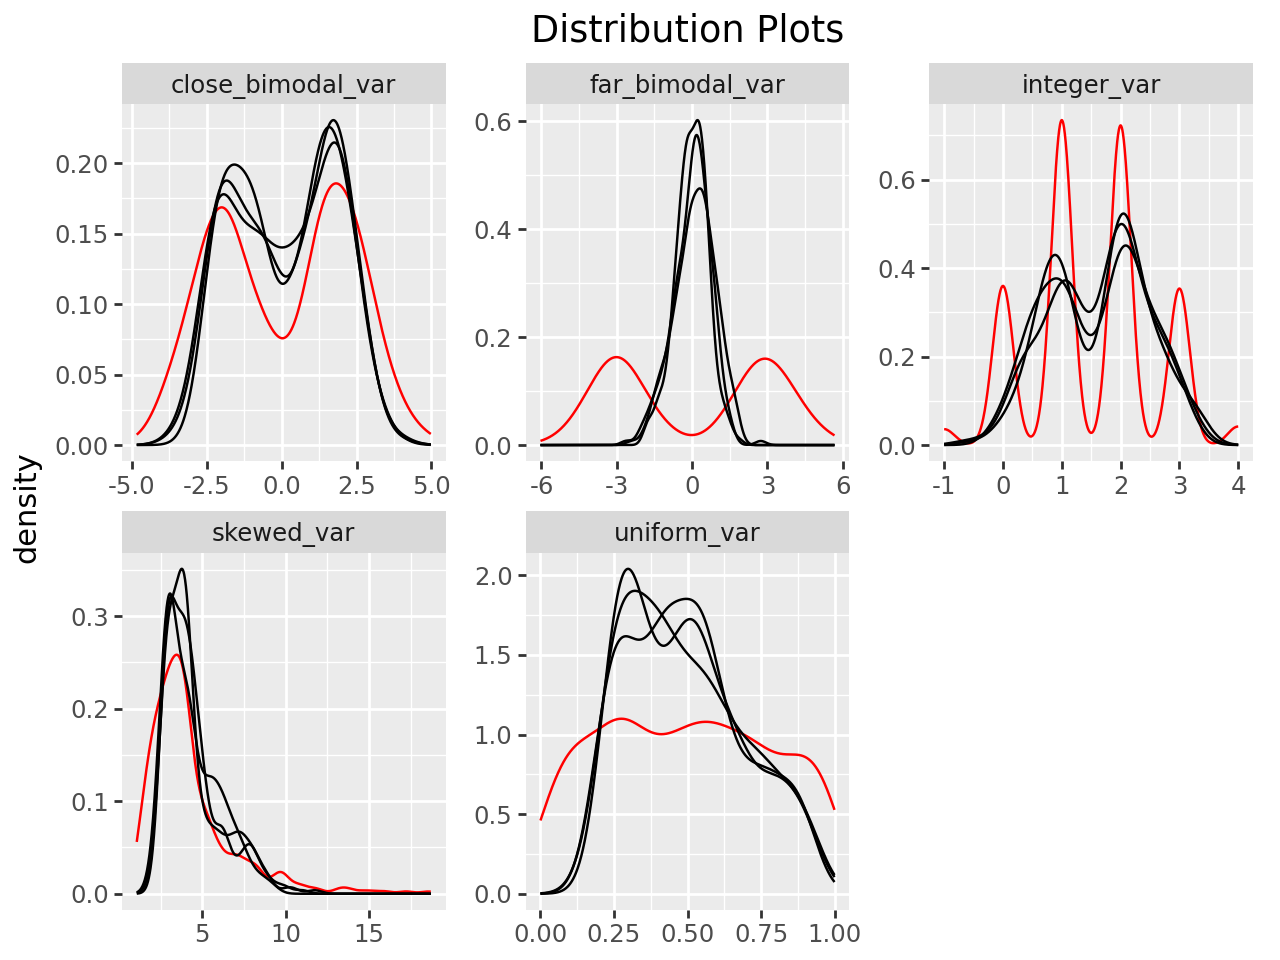

In [29]:
kernel_no_mean_match.plot_imputed_distributions()

You can see the effects that mean matching has, depending on the
distribution of the data. Simply returning the value from the model
prediction, while it may provide a better ‘fit’, will not provide
imputations with a similair distribution to the original. This may be
beneficial, depending on your goal.